In [1]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")

In [3]:
#parametros
g = 9.8 #m/s^2
m = 0.5 #kg
h = 0.25 #m
R = 0.14 #m
b=0.9
a0=-1.5 #m/s^2
tiempo = 10 #s
puntos = int(tiempo*200)
theta_0 = 0



In [4]:
#ecuaciones
def ecuacion_mov(t,w,g,m,h,R,b):
    I =(m/12)*(pow(R,2) + pow(0.02,2))
    theta, omega = w
    F1=omega
    f1=-(g/R)*np.sin(theta)-(a0/R)*np.cos(theta)-omega*b*R**2
    return [F1,f1]
    

In [5]:
def solucion_ecuaciones(cond_ini, g, m, h, R,b , time, puntos):
    t = np.linspace(0, time, puntos)
    args = (g, m, h, R,b)
    sol = integrate.solve_ivp(ecuacion_mov,[0,time],cond_ini,'DOP853',t,args=args)
    return sol

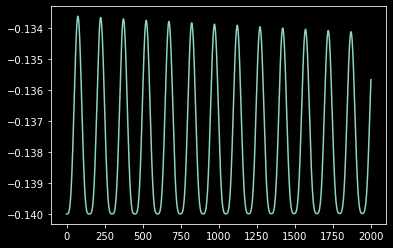

In [6]:
def polares_a_catesianas(x2,soluciones, R):
    x1 = x2[0]- R * np.sin(soluciones[0,:])
    y1 = - R * np.cos(soluciones[0,:])
    return np.array([x1, y1])
def solparax(cond_ini,tiempo,puntos):
    x0=cond_ini[0]
    v0 = cond_ini[1]
    t = np.linspace(0, tiempo, puntos)
    v = x0+v0*t
    x = (1/2)*a0*pow(t,2)+v0*t+x0
    return [x,v]
cond_ini = np.array([0,0,])
cond_ini2 =np.array([0,0.8373])
sol = solucion_ecuaciones(cond_ini,g,m,h,R,b,tiempo,puntos)
sol2 = solparax(cond_ini2,tiempo,puntos)
data = polares_a_catesianas(sol2, sol.y, R)
x= np.linspace(0,data[1,:].shape[0],data[1,:].shape[0])
plt.plot(x,data[1,:])

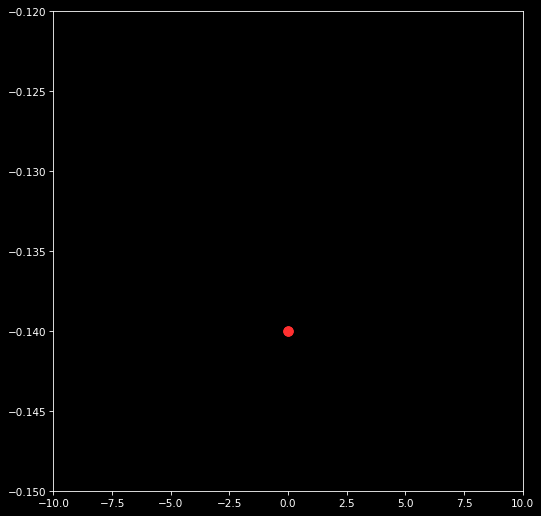

In [7]:
fps = 24
def update(num_frame,d,elements,paso):
    j = num_frame * paso
    masa, trayectoria = elements
    masa.set_offsets(d[:,j:j+2].T)
    trayectoria.set_data(d[:,j:j+2])
    return masa,trayectoria

def inicializar_elementos_graficos(d,m,ax):
    masa = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
    trayectoria, = ax.plot(d[0, :1], d[1, :1],c='#ff3030', zorder=-1)
    return masa, trayectoria
def ajustar_ejes_coordenados(R):
    fig = plt.figure(figsize = (7,7), dpi = 75 )
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
    ax = fig.gca()
    plt.tight_layout()
    plt.xlim([-10, 10])
    plt.ylim([-0.15, -0.12])
    return fig, ax
def crear_animacion(data, R, m, time, fps, name):
    N = time*fps
    paso = int(np.floor(data.shape[1] / N))
    if paso<1: raise ValueError('Escoje puntos > '+ str(N))
    fig, ax = ajustar_ejes_coordenados(R)
    elements = inicializar_elementos_graficos(data,m,ax)
    ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
    return ani
start_time = time.time()
crear_animacion(data,R,m,tiempo,fps,'penduloCM.gif')